In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the datasets

df= pd.read_excel('/content/MyDatasets/covid cases in BD.xlsx')
df_bd = df.copy()
df

,S. No.,Districts,Total Confirmed cases,Cured,Death
0,1,Barguna,33,0,1
1,2,Barisal,40,0,0
2,3,Bhola,5,0,0
3,4,Jhalokati,8,0,0
4,5,Patuakhali,28,0,1
...,...,...,...,...,...
59,60,Thakurgaon,17,0,0
60,611,Habiganj,55,0,0
61,62,Maulvibazar,12,0,2
62,63,Sunamganj,29,0,0


In [ ]:
# Coordinates of India States and Union Territories
BD_coord = pd.read_excel('/content/MyDatasets/locations.xlsx')

#Day by day data of Bangladesh India, Korea, Italy and Wuhan
dbd_BD = pd.read_excel('/content/MyDatasets/per_day_cases.xlsx',parse_dates=True, sheet_name='BD')
dbd_India = pd.read_excel('/content/MyDatasets/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/MyDatasets/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/MyDatasets/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/MyDatasets/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)

df['Total cases'] = df['Total Confirmed cases ']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID-19 cases across Bangladesh till date(31st May 2020):', total_cases)

Total number of confirmed COVID-19 cases across Bangladesh till date(1st May 2020): 7258


In [ ]:
df.style.background_gradient(cmap='Reds')

,Districts,Total Confirmed cases,Cured,Death,Total cases
0,Barguna,33,0,1,33
1,Barisal,40,0,0,40
2,Bhola,5,0,0,5
3,Jhalokati,8,0,0,8
4,Patuakhali,28,0,1,28
5,Pirojpur,9,0,0,9
6,Bandarban,7,0,0,7
7,Brahmanbaria,43,0,2,43
8,Chandpur,15,0,0,15
9,Chittagong,75,2,2,75


In [ ]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()

print('Total number of active COVID-19 cases across Bangladesh:', total_active)
Total_Cases = df.groupby('Districts')['Total Active'].sum().sort_values(ascending=False).to_frame()
Total_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID-19 cases across Bangladesh: 6966


,Total Active
Districts,
Dhaka,3912
Narayanganj,902
Gazipur,321
Kishoreganj,200
Narsingdi,149
Mymensingh,143
Munshiganj,108
Comilla,94
Chittagong,71


In [ ]:
df_full = pd.merge(BD_coord,df,on='Districts')

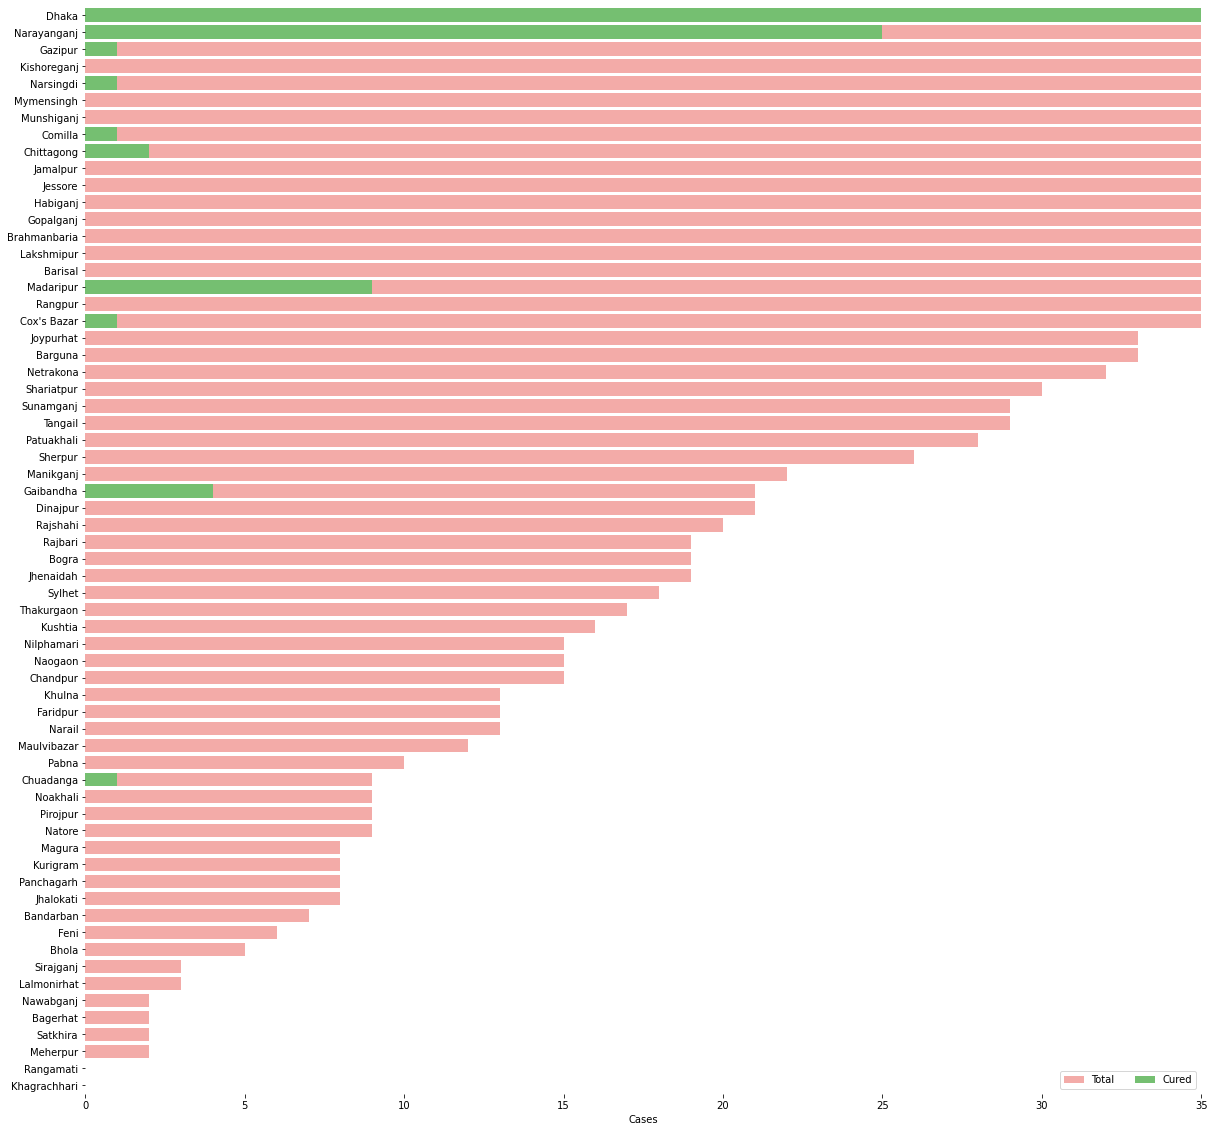

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
data = df_full[['Districts','Total cases','Cured','Death']]

data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Districts", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Districts", data=data, label="Cured", color="g")

#legend and axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [ ]:
#importing plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
# importing plotly.graph_objects as go
# Rise of COVID-19 cases in Bangladesh
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_BD['Date'], y = dbd_BD['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Bangladesh (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in Bangladesh

import plotly.express as px
fig = px.bar(dbd_BD, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Bangladesh on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:

fig = px.bar(dbd_BD, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Bangladesh', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Italy", "India","Bangladesh","S.Korea"))

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_BD['Date'], y=dbd_BD['Total Cases'],
                    marker=dict(color=dbd_BD['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India', 'Bangladesh']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)', 'rgb(50,130,189)']

mode_size = [10, 10, 10, 12]
line_size = [1, 1, 1, 8]

fig = go.Figure()

fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_BD['Days after surpassing 100 cases'], 
                 y=dbd_BD['Total Cases'],mode='lines',
                 name=labels[3],
                 line=dict(color=colors[3], width=line_size[3]),            
                 connectgaps=True))

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

In [ ]:
#worldwide data of covid-19 cases

df = pd.read_csv('/content/MyDatasets/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/MyDatasets/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/MyDatasets/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/MyDatasets/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [ ]:
#checking for bangladesh's data
df.query('Country=="Bangladesh"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,17.0,1.0,3.0
58,2020-03-20,20.0,1.0,3.0
59,2020-03-21,25.0,2.0,3.0
60,2020-03-22,27.0,2.0,3.0


In [ ]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,335678.798925,375545.052055
65,2020-03-27,372235.326938,351581.337762,393412.456854
66,2020-03-28,388674.964143,366281.660717,410033.643591
67,2020-03-29,405307.954675,383853.719422,425399.005924
68,2020-03-30,418529.648466,394257.588113,440412.251508


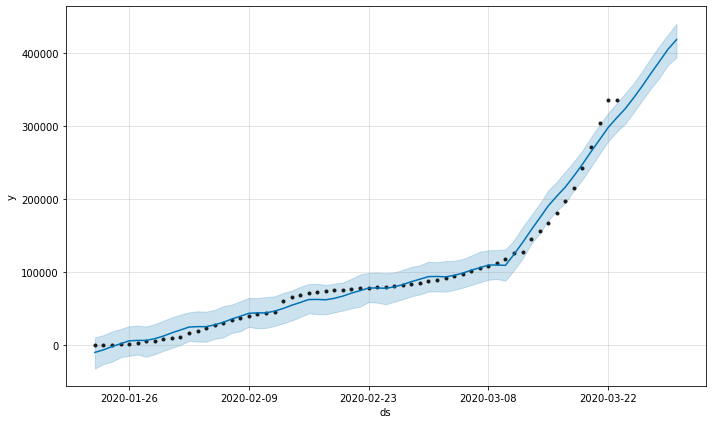

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

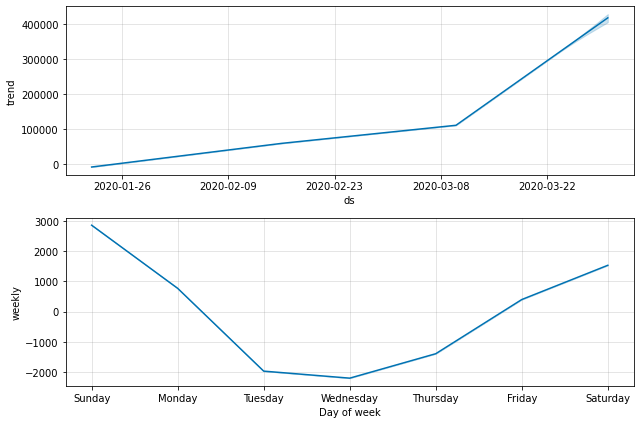

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14442.551979,16331.023838
65,2020-03-27,16199.617603,15235.246904,17160.432749
66,2020-03-28,17006.904589,16036.865658,17975.138635
67,2020-03-29,17831.505383,16775.223113,18851.873323
68,2020-03-30,18490.986176,17388.846352,19589.078986


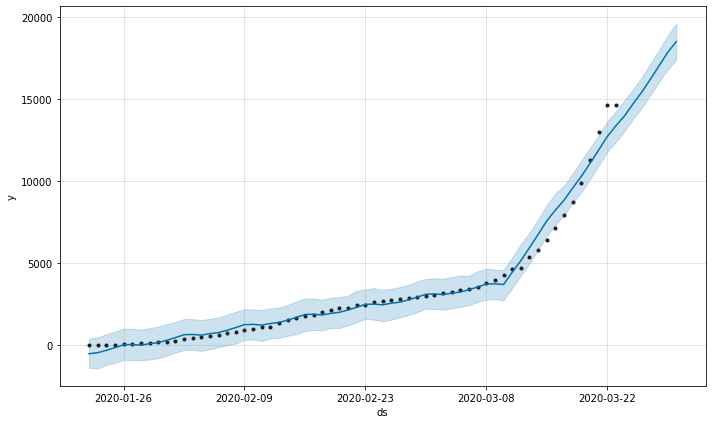

In [ ]:
deaths_forecast_plot = m.plot(forecast)

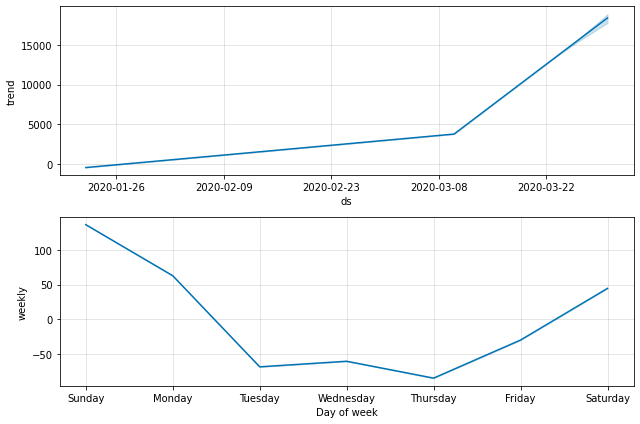

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101379.337891,104793.960297
65,2020-03-27,105338.025042,103410.158312,107169.454819
66,2020-03-28,108256.310813,106148.572159,110418.621524
67,2020-03-29,111119.296170,108567.481915,113558.171707
68,2020-03-30,113244.961749,110553.717493,116156.862859


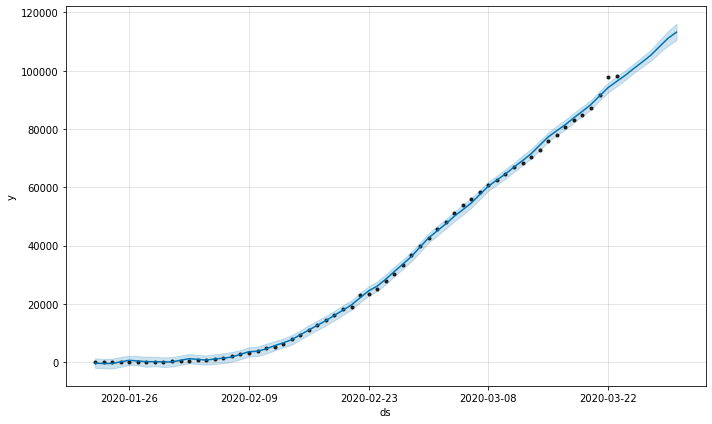

In [ ]:
recovered_forecast_plot = m.plot(forecast)


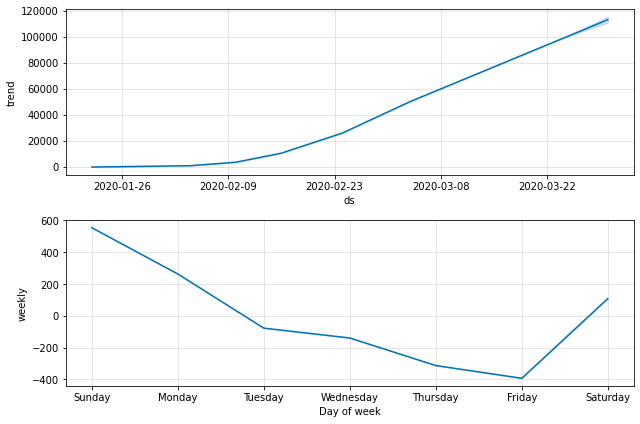

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)
